Epoch 0 Loss: 0.5216424405285589
Epoch 100 Loss: 0.13380721473507778
Epoch 200 Loss: 0.13116708208662184
Epoch 300 Loss: 0.13148088494700227
Epoch 400 Loss: 0.13622829314737406
Epoch 500 Loss: 0.1197245024981506
Epoch 600 Loss: 0.11822143171023036
Epoch 700 Loss: 0.11791808426894576
Epoch 800 Loss: 0.11777184144456598
Epoch 900 Loss: 0.11762509970688372

Train Accuracy: 0.8095238095238095
Test Accuracy: 0.8222222222222222


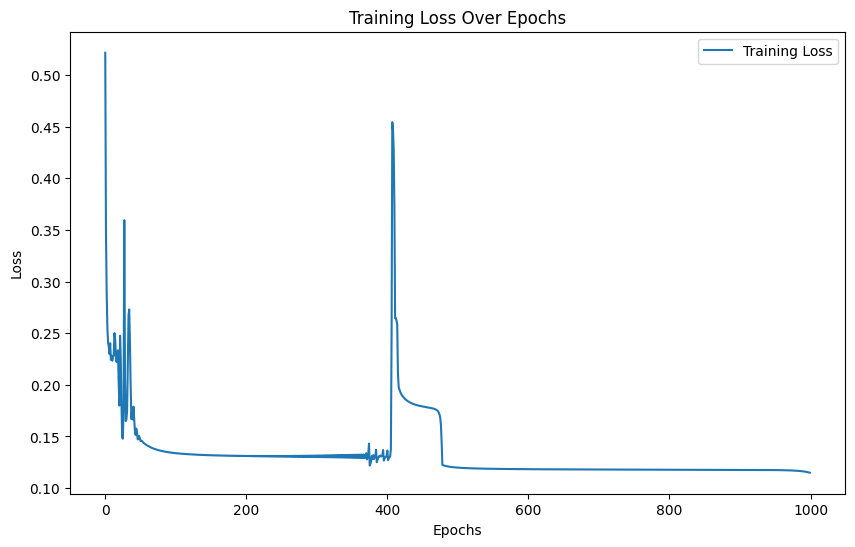

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Initialize network parameters
input_size = 4  # Number of input features (for Iris dataset)
hidden_size = 5  # Number of neurons in the hidden layer
output_size = 3  # Number of output classes
learning_rate = 0.1
epochs = 1000

# Define activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Define the forward pass
def forward_pass(X, weights_input_hidden, weights_hidden_output):
    hidden_input = np.dot(X, weights_input_hidden)
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, weights_hidden_output)
    final_output = sigmoid(final_input)
    return hidden_output, final_output

# Define the backward pass (backpropagation)
def backward_pass(X, y, hidden_output, final_output, weights_input_hidden, weights_hidden_output):
    output_error = y - final_output
    output_delta = output_error * sigmoid_derivative(final_output)

    hidden_error = output_delta.dot(weights_hidden_output.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_output)

    weights_hidden_output += hidden_output.T.dot(output_delta) * learning_rate
    weights_input_hidden += X.T.dot(hidden_delta) * learning_rate

    return weights_input_hidden, weights_hidden_output

# Train the network
def train(X, y, input_size, hidden_size, output_size, epochs, learning_rate):
    weights_input_hidden = np.random.rand(input_size, hidden_size)
    weights_hidden_output = np.random.rand(hidden_size, output_size)
    loss_history = []

    for epoch in range(epochs):
        hidden_output, final_output = forward_pass(X, weights_input_hidden, weights_hidden_output)
        weights_input_hidden, weights_hidden_output = backward_pass(X, y, hidden_output, final_output, weights_input_hidden, weights_hidden_output)

        loss = np.mean(np.square(y - final_output))
        loss_history.append(loss)
        if epoch % 100 == 0:
            print(f"Epoch {epoch} Loss: {loss}")

    return weights_input_hidden, weights_hidden_output, loss_history

# Evaluate the network
def predict(X, weights_input_hidden, weights_hidden_output):
    _, final_output = forward_pass(X, weights_input_hidden, weights_hidden_output)
    return np.argmax(final_output, axis=1)

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# One-hot encode the target variable
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the network
weights_input_hidden, weights_hidden_output, loss_history = train(X_train, y_train, input_size, hidden_size, output_size, epochs, learning_rate)

# Make predictions
y_pred_train = predict(X_train, weights_input_hidden, weights_hidden_output)
y_pred_test = predict(X_test, weights_input_hidden, weights_hidden_output)

# Convert one-hot encoded y_train and y_test back to single labels for evaluation
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Evaluate the network
train_accuracy = np.mean(y_pred_train == y_train_labels)
test_accuracy = np.mean(y_pred_test == y_test_labels)
print()
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Plot the loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), loss_history, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()
